# 통계 기초 밑바닥부터

__참고:__ 여기서 사용하는 코드는 조엘 그루스(Joel Grus)의 
[밑다닥부터 시작하는 데이터 과학](https://github.com/joelgrus/data-science-from-scratch) 
5장에 사용된 소스코드의 일부를 기반으로 작성되었다.

## 주요 내용

데이터 분석의 기본이 바로 통계 분야의 주요 개념과 기법이다.
여기서는 앞으로 우리에게 필요한 정도의 통계의 기본 개념과 기법을 간단하게 소개한다.

다루는 주제는 다음과 같다.

1. 중심경향성
1. 산포도
1. 상관관계
1. 심슨의 역설
1. 상관관계와 인과관계

## 데이터셋 설명하기

총 204명의 사용자 각각의 친구수에 데이터가 다음과 같이 주어졌다고 가정한다.
즉, 사용자별 최대 친구수는 100명이고, 최소 1명이다. 

In [1]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,
               15,15,15,14,14,13,13,13,13,12,12,11,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,10,9,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,
               8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,
               7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
               3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

사용자 수는 204명이고, 사용자별 최대 친구수는 100명, 최소 친구수는 1명이다. 

In [2]:
print(f"사용자 수:\t{len(num_friends)}", 
      f"최대 친구 수:\t{max(num_friends)}", 
      f"최소 친구 수:\t{min(num_friends)}", sep='\n')

사용자 수:	204
최대 친구 수:	100.0
최소 친구 수:	1


In [3]:
from collections import Counter
import matplotlib.pyplot as plt

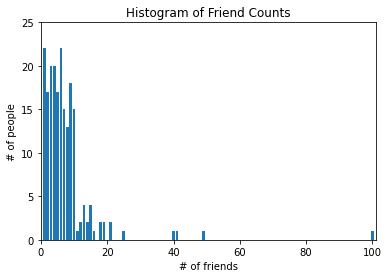

In [4]:
friend_counts = Counter(num_friends)
xs = range(101)                         # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

위 히스토그램에서 보여지는 것은 다음과 같다.

* 많은 사람들이 10명 이내의 친구를 갖는다.
* 100명의 친구를 가진 사용자도 있다.

다른 정보를 어떻게 구할 수 있을까? 

예를 들어, 대다수 사람들의 친구 수는 어딘가로 쏠리는 경향이 있어 보인다.
이것을 전문용어로 표현하면 **중심 경향성**이다.
즉, 일반적으로 사용자들의 친구 수를 대표하는 중심이 존재한다는 의미이다.

In [5]:
friend_counts

Counter({100.0: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

## 중심 경향성

중심 경향성은 데이터의 중심의 위치를 알려주며, 중심 경향성을 지정하기 위해 보통 세 종류의 평균(average)을 사용한다.

1. 평균값(mean)
1. 중앙값(median)
1. 최빈값(mode)

**주의:** 평균(average)과 평균값(mean)를 혼동하지 말아야 한다. 

### 전제

$X$를 데이터셋이라 하고, $X$의 크기, 즉, 테이터 개수를 $n$이라 하자.

### 평균값

평균값(mean)은 우리가 보통 평균이라 부르는 값이며 모든 데이터의 합을 데이터 개수로 나눈다.
그러면, 데이터셋 $X$의 평균값은 보통 그리스 알파벳 뮤($\mu$) 또는 $E(X)$로 표시하며 값은 아래와 같다.

$$
E(X) = \mu = \frac{\sum X}{n}
$$

$X=$ `num_friends` 일 때 사용자들의 평균 친구수는 7.33명이다.

In [6]:
from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

### 중앙값

중앙값(median) 말 그대로, 데이터의 중앙위치에 자리잡은 값이다. 
단, 데이터를 크기순으로 정렬했을 때 중앙위치에 있는 값이다.
따라서 중앙값을 구하려면 먼저 데이터를 크기순으로 정렬해야 한다.
그 다음에 중앙위치를 찾아내어 그곳에 위치한 값을 확인한다.

그런데 $n$이 짝수이면 중앙위치에 두 수 사이에 있기 때문에 두 수의 평균값을 중앙값으로 사용한다. 

<img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/median.png" width="30%">

출처: [위키백과](https://en.wikipedia.org/wiki/Median)

친구수의 중앙값은 6명이다.

In [7]:
def _median_odd(xs: List[float]) -> float:
    """길이가 홀수일 때"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """길이가 짝수일 때"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """중앙값 찾기"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

median(num_friends)

6.0

#### 평균값과 중앙값의 차이

평균값은 데이터에 민감한 반면에 중앙값은 그렇지 않다. 
예를 들어, `num_friends`에서 최대 친구수를 100명에서 200명으로 바꾸면
그러면 평균값은 7.33명에서 7.82명으로 올라간다.

In [8]:
Y = num_friends.copy()
Y[0]=200
mean(Y)

7.823529411764706

하지만 중앙값은 변하지 않는다.

In [9]:
median(Y)

6.0

#### 이상치

앞서 살펴보았듯 평균값은 특정 값에 민감하게 반응한다. 
`num_friends`의 경우 친구수가 평규 7.33명인데 100명의 친구가 있는 경우는 매우 특이하다고 할 수 있다.
이런 데이터를 **이상치**(outlier)라 부른다. 
따라서 이상치가 존재하면 평균값이 데이터에 대한 잘못된 정보를 전달할 수 있다. 

예를 들어, 2013년 3월 당시, 국회의원들의 평균재산은 94억 9000만원이었다.
하지만 이상치값을 보인 두 의원을 제외하면 23억 3000만원이다. 
두 개의 이상치는 현대중공업의 대주주인 정몽준의 약 2조원 가량의 재산과 다른 한 명의 약 2000억원 가량의 재산이었다.

#### 사분위수

중앙값은 중앙위치에 있는 값이며, 세 개의 사분위수(quantile) 중에 하나이다.
다룬 두 개의 사분위수는 하위 25% 위치에 있는 제1사분위수와
상위 25% 위치에 있는 제3사분위수이다. 
즉, 중앙값은 상위 50%에 해당하는 제2사분위수에 해당한다.

<img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/quantile.png" width="60%">

`num_friends`의 제1사분위수와 제3사분위수는 각각 3명과 9명이다.

In [10]:
def quantile(xs: List[float], p: float) -> float:
    """p% 위치값 차기"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

print("제1사분위수:", quantile(num_friends, 0.25))
print("제3사분위수:", quantile(num_friends, 0.75))

제1사분위수: 3
제3사분위수: 9


### 최빈값

데이터에서 가장 자주 나오는 값을 최빈값(mode)라 부르며, 
경우에 따라 평균값, 중앙값 대신에 중심을 대표하는 값으로 사용된다. 

`num_friends`의 최빈값은 1과 6이다.

In [11]:
def mode(x: List[float]) -> List[float]:
    """최빈값"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

set(mode(num_friends))

{1, 6}

In [12]:
counts = Counter(num_friends)
counts

Counter({100.0: 1,
         49: 1,
         41: 1,
         40: 1,
         25: 1,
         21: 2,
         19: 2,
         18: 2,
         16: 1,
         15: 4,
         14: 2,
         13: 4,
         12: 2,
         11: 1,
         10: 15,
         9: 18,
         8: 13,
         7: 15,
         6: 22,
         5: 17,
         4: 20,
         3: 20,
         2: 17,
         1: 22})

In [13]:
max_count = max(counts.values())
max_count

22

In [14]:
[x_i for x_i, count in counts.items() if count == max_count]

[6, 1]

## 산포도

산포도는 데이터가 얼마나 퍼져 있는지를 측정한다. 
산포도가 0에 가까운 값이면 퍼져있지 않고 한 값 주위에 뭉쳐있다는 의미이고,
0에서 멀어질 수록 퍼져있는 정도가 커진다는 의미이다. 

산포도를 측정하는 기준은 보통 다음과 같다.

1. 범위(range)
1. 사분범위(interquntile range)
1. 분산(variance)
1. 표준편차(standard deviation)

### 범위

범위는 데이터셋의 최대값과 최소값의 차이를 가리킨다. 
일반적으로 범위가 크다는 것은 데이터의 퍼짐 정도가 크다는 것을 의미한다. 

그런데 범위는 최대, 최소값에만 의존한다. 
예를 들어, 최대값 100, 최소값 1인 데이터는 모두 `num_friends`와 동일한 범위를 갖는다.
따라서 데이터의 특성을 제대로 반영하지 못할 수가 있다.

<img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/num_friends.png" width="60%">

`num_friends`의 범위는 99임을 다시 한 번 확인할 수 있다.

In [15]:
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

data_range(num_friends)

99.0

### 사분범위

평균, 분산, 표준편차와 함께 범위도 이상치에 민감하다.
이런 점을 해소하기 위해 제1사분위수와 제3사분위수 사이의 범위인 사분범위를 사용하기도 한다. 

예를 들어, `num_friends`의 사분범위는 6이다.
범위가 99였던 것에 비해 매우 작은 산포도를 의미한다.

In [16]:
def interquartile_range(xs: List[float]) -> float:
    """제3사분위수 - 제1사분위수"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

interquartile_range(num_friends)

6

### 분산

데이터 평균값과의 차이의 제곱들의 평균값이 분산이다.
쉽게 말하면, 데이터가 평균값으로부터 얼마나 떨어져 있는가를 알려주는 값이며,
정확한 계산식은 다음과 같으며, 
데이터셋 $X$의 분산은 보통 $\textit{Var}(X)$ 기호로 나타낸다.

$$
\textit{Var}(X) = \frac{\sum (X - \mu)^2}{n-1}
$$

**주의:** 일반적으로 분모를 $n$으로 한다. 
하지만 데이터 표본으로부터 전체에 대한 분산을 추정하는 경우 $(n-1)$을 사용한다.
실제로 데이터분석에 다루는 데이터는 거의 표본 데이터이다.

`num_friends` 데이터의 분산값은 81.54이다.

In [17]:
def dot(v: List[float], w: List[float]) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "List[float]s must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: List[float]) -> float:
    """반환값: v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def de_mean(xs: List[float]) -> List[float]:
    """평균값과의 차이 계산"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """분산값 계산. 단, 2개 이상의 데이터가 있어야 함."""
    assert len(xs) >= 2, "두 개 이상의 데이터 필요"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

variance(num_friends)

81.54351395730716

### 표준편차

분간값의 단위는 원래 단위의 제곱이다.
따라서 분산값 보다는 분산값의 제곱근을 보다 많이 사용한다. 

표본의 표준편차를 나타내는 기호는 보통 $s$이다. 

$$s_X = \sqrt{\textit{Var}(X)}$$

`num_friends`의 표준편차는 9.03이다.

In [18]:
import math

def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

9.03014473623248

#### 이상치의 영향

앞서 평균값이 이상치의 영향을 크게 받는다는 것을 보았다.
따라서 분산과 표준편차 역시 이상치의 영향을 받는다.

## 상관관계

두 데이터셋이 서로 상관이 있는가를 알고자 할 때 상관관계를 파악하며, 
상관관계의 정도는 보통 공분산(covariance) 또는 피어슨 상관계수(correlation)로 측정한다. 

예를 들어, 사용자가 사이트에서 보내는 시간과 친구 수 사이의 연관성을 파악하고자 한다.

In [19]:
print(num_friends)

[100.0, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [20]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,
                 31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,
                 36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,
                 23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,
                 26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,
                 27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,
                 23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,
                 31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,
                 29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,
                 35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,
                 19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,
                 15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,
                 18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,
                 41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,
                 27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,
                 36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,
                 28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
                 36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,
                 33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,
                 13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,
                 30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,
                 33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

`num_friends`와 `daily_minutes`는 각각 
사용자별 친구수와 사이트에서 머무르는 시간을 순서에 맞게 데이터로 담고 있다.

### 공분산

두 데이터셋의 공분산은 각 데이터넷의 변수가 각각의 평균값으로부터 떨어져 있는 정도를 계산하며,
수식은 다음과 같다. 

두 데이터셋 $X$와 $Y$를 크기를 $n$이라 하자.

그러면, $X$와 $Y$의 공분산 $Cov(X, Y)$는 다음과 같다.

$$
Cov(X,Y) = \frac{\sum (X- E(X))(Y- E(Y))}{n-1}
$$

친구수와 사용시간 사이의 공분산은 22.43이다.

In [21]:
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

#### 공분산의 특징과 한계

어떤 사용자에 대해 친구수와 사용시간 모두 평균보다 작거나 모두 크면 공분산에 양수의 값이 더해진다.
반면에 친구수가 평균보다 작지만, 사용시간은 평균보다 크면 음수의 값이 공분산에 더해진다. 
따라서 친구수와 사용시간이 평균을 기준으로 동일한 방향(크거나 작다 기준)이냐 아니냐가 공분산 값에 영향을 미친다.

그런데 친구수는 그대로인데 사용시간만 늘면 공분산은 증가한다. 
하지만 그렇다고 해서 친구수와 사용시간의 연관성이 어떻게 변한 것인지를 판단하기는 어렵다.
즉, 공분산이 크다, 작다의 기준을 잡기가 어렵다. 

### 피어슨 상관계수

공분산의 한계를 해결하기 위해 피어슨 상관계수가 제시되었다. 
피어슨 상관계수는 공분산을 각 데이터셋의 표준편차의 곱으로 나누어
두 데이터셋 사이의 **선형** 상관관계를 수치로 계산한다.

두 데이터셋 $X, Y$의 피어슨 상관계수 계산은 다음과 같다.

$$
Correl(X,Y) = \frac{Cov(X,Y)}{s_X \cdot s_Y}
$$

#### 피어슨 상관계수의 특징

* 피어슨 상관계수는 -1과 1 사이의 실수이다.
* 1에 가까울 수록 양의 선형관계가 성립한다.
* -1에 가까울 수록 음의 선형관계가 성립한다.
* 0에 가깔울 수록 선형관계가 약해진다.

<img src="https://raw.githubusercontent.com/codingalzi/pydata/master/notebooks/images/Correlation.png" width="70%">

출처: [위키백과](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

친구수와 사용시간 사이의 상관관계는 0.25이며, 
이는 두 데이터셋 사이의 상관 정도가 크지 않음을 의미한다. 

In [22]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """공분산 계산"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

correlation(num_friends, daily_minutes)

0.24736957366478218

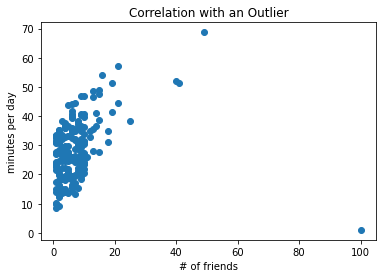

In [23]:
plt.scatter(num_friends, daily_minutes)

plt.title("Correlation with an Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

#### 이상치와 상관관계

이상치가 상관관계에도 영향을 준다. 

위 예제에서 100명의 친구를 가진 사용자의 사이트 사용시간이 1분이며,
이 사용자의 데이터는 확실히 이상치라고 할 수 있다. 
이제 이 사용자의 데이터를 제거하고 상관관계를 계산하면, 이번에는 상관계수가 0.57이 된다.
두 데이터셋의 상관정도가 두 배이상 커졌다.

In [24]:
outlier = num_friends.index(100)    # 이상치의 인덱스

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.5736792115665573

이상치의 존재여부에 따른 두 데이터셋의 그래프도 모양이 달라지며,
이상치를 제거한 후의 그래프의 선형 상관관계가 보다 명확하게 보여진다.

##### 이상치 제거 후

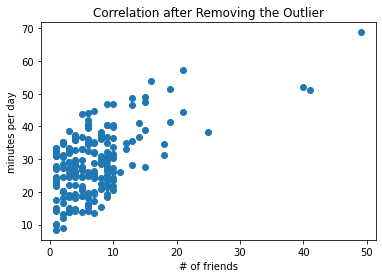

In [25]:
plt.scatter(num_friends_good, daily_minutes_good)

plt.title("Correlation after Removing the Outlier")
plt.xlabel("# of friends")
plt.ylabel("minutes per day")
plt.show()

## 심슨의 역설

상관계수를 계산할 때 소위 혼재변수(confounding variable)를 고려하지 않으면 잘못된 결과를 얻는다.

예를 들어, 
모든 데이터 과학자를 서부와 동부로 구분할 수 있다고 가정하자.
그리고 각 데이터 과학자들의 친구수를 확인해 보았다.

| 지역 | 데이터 과학자 수 | 평균 친구 수|
| --- | -------------| -------- |
| 서부 | 101          | 8.2명     |
| 동부 | 103          | 6.5명     |

위 표에 의하면 서부에 사는 데이터 과학자들이 보다 사교적이다.
그런데 이번엔 박사학위 소유여부를 포함하여 데이터를 조사하였다.

| 지역 | 학위 | 데이터 과학자 수 | 평균 친구 수|
| --- | --- | -------------| -------- |
| 서부 | 박사 | 35          | 3.1명     |
| 동부 | 박사 | 70          | 3.2명     |
| 서부 | 기타 | 66          | 10.9명     |
| 동부 | 기타 | 33          | 13.4명     |


그랬더니 박사학위가 있거나 없거나 동부 지역의 데이터 과학자가 평균적으로 보다 많은 친구관계를 맺고 있다.
앞서 박사학위 여부를 따지지 않을 때와 서로 모순되는 결과를 보여준다.
왜 그럴까?

정답은 두 데이터셋 사이의 상관계수를 측정할 때 주어진 데이터셋 이외의 
다른 조건들은 모두 동일하다고 전제하는 데에 있다.
그런데 위 데이터 과학자들의 경우 박사학위 소지 여부가 평균 친구 수에 영향을 준다. 

따라서 단순히 서부와 동부로 구분해서 친구 수를 비교하여 상관계수를 구하면 
다른 조건이 동일해야 한다는 전제조건을 어긴 조건에서 결과를 유도한 것이다.

박사학위 소지 여부를 조건으로 첨가하면 동부 지역의 데이터 과학자가 보다 사교적으로 나오지만
그렇지 않은 경우에는 반대의 결과가 나오는 이유는 
두 가지이다.

1. 박사들의 친구 수가 상대적으로 적다.
1. 동부 지역에 박사 데이터 과학자가 보다 많이 산다.

따라서 서부 지역의 경우 박사학위가 없는 사람들이 보다 많고 그들이 보다 많은 친구를 가지고 있기에
전체 데이터 과학자들의 평균 친구수가 동부 보다 높아게 된다.

## 상관계수 관련 추가 주의사항

상관관계가 0 또는 1에 아주 가깝다고 해서 반드시 어떤 관계도 없다거나 
매우 밀접합 선형관계이다라고 섣부르게 결론 내리면 위험하다. 

### 예제 1

다음 두 개의 데이터셋 x와 y를 살펴보자. 

<table>
<tr>
    <td>x</td>
    <td>-2</td>
    <td>-1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
<tr>
    <td>y</td>
    <td>2</td>
    <td>1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
</table>

x와 y의 상관계수는 0이다. 

In [26]:
x = [-2, -1, 0, 1, 2]
y = [ 2,  1, 0, 1, 2]

correlation(x,y)

0.0

하지만 y는 x의 항목의 절댓값을 항목으로 갖는다. 
즉, 이런 데이터는 상관계수로 두 데이터셋의 연관성을 측정할 수 없다.

### 예제 2

다음 두 개의 데이터셋 x와 y를 살펴보자. 

<table>
<tr>
    <td>x</td>
    <td>-2</td>
    <td>-1</td>
    <td>0</td>
    <td>1</td>
    <td>2</td>
</tr>
<tr>
    <td>y</td>
    <td>99.98</td>
    <td>99.99</td>
    <td>100</td>
    <td>100.01</td>
    <td>100.02</td>
</tr>
</table>

x와 y의 상관계수는 1이다. 

In [27]:
x = [-2, -1, 0, 1, 2]
y = [99.98, 99.99, 100, 100.01, 100.02]

correlation(x,y)

1.0

하지만 두 데이터셋 사이의 선형관계가 정말로 완벽하게 선형인지에 대해서는 장담할 수 없다.

## 상관관계와 인과관계

두 데이터셋 사이에 상관관계가 있다고 해서 한 쪽이 다른 쪽에 영향을 주는 인과관계가 있다고 주장할 수 없다. 
왜냐하면 두 데이터셋에 영향을 주는 다른 외부 요소가 존재할 수 있기 때문이다.

예를 들어, 친구 수를 담은 `num_friends`와 사이트 사용시간을 담은 `daily_minutes`의 관계를 살펴보자.
그러면 최소 세 가지 시나리오가 가능하다.

1. 사이트에서 많은 시간을 보낼 수록 많은 친구를 사귄다.
1. 많은 친구가 있으니까 사이트에서 시간을 보다 많이 보낸다.
1. 사이트에서 많은 정보를 얻을 수 있으니까 사용시간이 길어지고, 그러다 보니까 친구가 늘어난다.

이 중에 어떤 것이 맞는지는 다른 방법으로 확인해봐야 한다. 
예를 들어, 사용자 집단을 임의로 두 모둠으로 나누고, 한쪽 모둠에만 특정 친구들의 글만 보여주는 것과 같이,
한 쪽 모둠에만 영향을 주는 실험을 하고 그 결과를 비교한다.
이런 식으로 해서 상관관계의 진짜 근거를 얻어내도록 해야 한다.

## 연습문제

### 문제 1

본문 내용을 넘파이 어레이 객체를 이용하여 구현하라.

### 문제 2

본문 내용을 판다스 시리즈와 데이터프레임 객체를 이용하여 구현하라.